In [4]:
#Problem Statement
#Develop a sentiment analysis model to classify restaurant reviews as posititve or negative

In [5]:
#Description
#with the rapid growth of online platforms for sharing opinions and reviews,restaurants often rely on customer feedback to improve their services and attract a new customers.
#Analyzing the sentiment of theses reviews can provide valuable insights into customer satisfaction

In [1]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Reviews.csv")

In [15]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [15]:
df.tail()#last 5 elements

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [31]:
df.info()#data information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [32]:
df.describe()#statstical information of dataset

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [33]:
#checking null values of dataset
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [35]:
df.duplicated() # checking duplicate values

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [36]:
#checking of value counts
value_counts=df['Liked'].value_counts()
print(value_counts)

Liked
1    500
0    500
Name: count, dtype: int64


In [42]:
#explotary data analysis(eda) - convert text/table  into pictorial
import matplotlib.pyplot as plt
import seaborn as sns

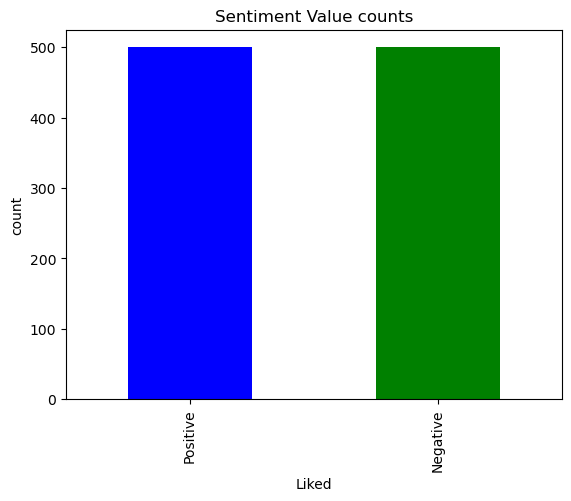

In [44]:
value_counts.plot(kind='bar' ,color=['blue','green'])
plt.title("Sentiment Value counts")
plt.xlabel('Liked')
plt.ylabel('count')
plt.xticks(ticks=[0,1],labels=['Positive','Negative'])
plt.show()

In [76]:
import sys
print(sys.path)


['C:\\Users\\bpenchalaiah', 'C:\\ProgramData\\anaconda3\\python311.zip', 'C:\\ProgramData\\anaconda3\\DLLs', 'C:\\ProgramData\\anaconda3\\Lib', 'C:\\ProgramData\\anaconda3', '', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\Pythonwin']


In [78]:
import sys
sys.path.append('C:\\Users\\bpenchalaiah\\AppData\\Roaming\\Python\\Python311\\site-packages')

from wordcloud import WordCloud


In [79]:
!pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable


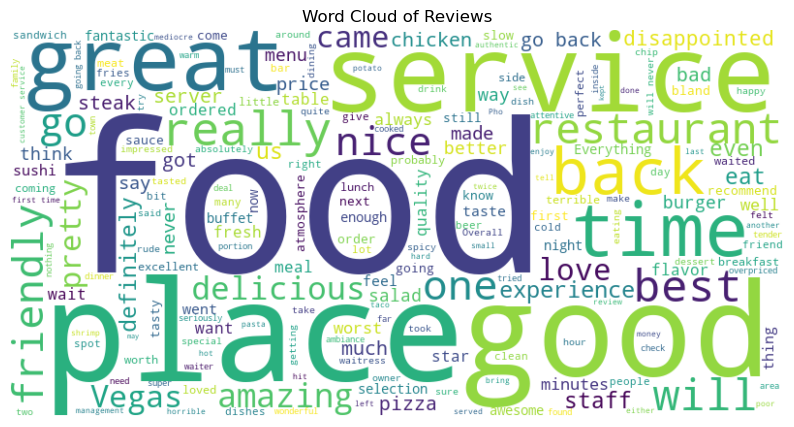

In [80]:
combined_text=" ".join(df['Review'])
wordcloud=WordCloud(width=800,height=400,background_color='White').generate(combined_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show() 

In [67]:
from collections import Counter

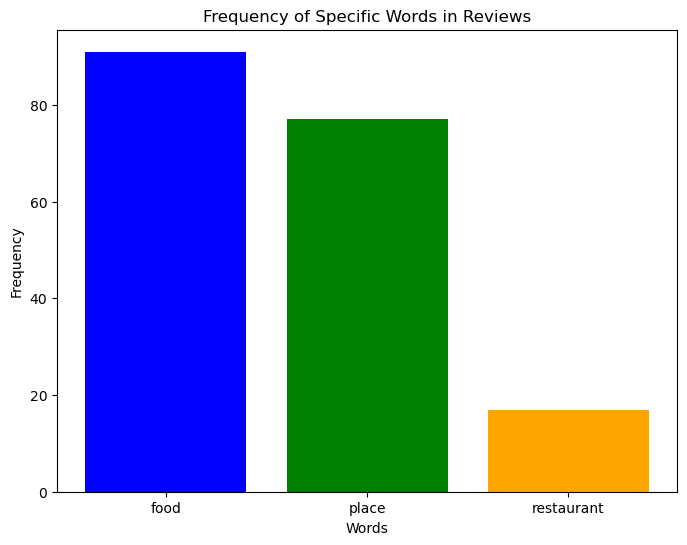

In [85]:
target_words = ['food', 'place','restaurant']
# Combine all the text from the 'Review' column, convert to lowercase, and split into words
all_words = ' '.join(df['Review']).lower().split()
# Count the occurrences of each word
word_counts = Counter(all_words)
# Create a dictionary with the counts of the target words
target_word_counts = {word: word_counts[word] for word in target_words}
# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(target_word_counts.keys(), target_word_counts.values(), color=['blue', 'green', 'orange'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Specific Words in Reviews')
plt.show()

In [2]:
#text preprocessing

In [16]:
#convert dataset into lowercase
lowercase_text=df['Review'].str.lower()
print(lowercase_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [20]:
#tokenization
import nltk
from nltk.tokenize import word_tokenize

In [23]:
df['Tokens'] = df['Review'].apply(word_tokenize)
print(df['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [24]:
import string

In [ ]:
df['Review']=df['Review'].str.replace(f"[{string.punctuation}]"," ",regex=True)

In [25]:
print(df['Review'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [26]:
#removing stop words
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bpenchalaiah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bpenchalaiah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
stop_words=set(stopwords.words('english'))

In [28]:
df['Tokens']=df['Review'].apply(lambda x:[word for word in word_tokenize(x) if word not in stop_words ])

In [29]:
print(df['Tokens'])

0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object


In [30]:
#stemming
#stemming refers to changing it tot its root word
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [31]:
stemmer=PorterStemmer()

In [32]:
df['stemmed']=df['Review'].apply(lambda x:' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

In [33]:
print(df['stemmed'])

0                               wow ... love thi place .
1                                    crust is not good .
2               not tasti and the textur wa just nasti .
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                             appetit instantli gone .
997      overal i wa not impress and would not go back .
998    the whole experi wa underwhelm , and i think w...
999    then , as if i had n't wast enough of my life ...
Name: stemmed, Length: 1000, dtype: object


In [69]:
#lematization is tranforming the word into its base or dictionary form


In [34]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bpenchalaiah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [36]:
lemmatizer=WordNetLemmatizer()

In [37]:
df['Lemmatized']=df['Review'].apply(lambda x:" ".join([lemmatizer.lemmatize(word,pos=wordnet.VERB) for word in word_tokenize(x)]))

In [39]:
print(df['Lemmatized'])

0                             Wow ... Loved this place .
1                                    Crust be not good .
2              Not tasty and the texture be just nasty .
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly go .
997     Overall I be not impress and would not go back .
998    The whole experience be underwhelming , and I ...
999    Then , as if I have n't waste enough of my lif...
Name: Lemmatized, Length: 1000, dtype: object


In [40]:
#removing the numbers from reviews
import re
df['No_Numbers']=df['Review'].apply(lambda x :re.sub(r'\d+',' ' ,x))

In [41]:
print(df['No_Numbers'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [42]:
#removing speacial characters like @ ,#, $, %,*
df['cleaned']=df['Review'].apply(lambda x:re.sub(r'[^A-Za-z0-9\s]',' ',x))

In [43]:
print(df['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [44]:
#expanding method
#i.e expand the words ex:don't-do not
!pip install contractions

Defaulting to user installation because normal site-packages is not writeable


In [45]:
import contractions
df['Expanded']=df['Review'].apply(contractions.fix)

In [46]:
print(df['Expanded'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I had not wasted enough of my life...
Name: Expanded, Length: 1000, dtype: object


In [47]:
#removing emojis
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable


In [48]:
import emoji
df['emoji']=df['Review'].apply(emoji.demojize)

In [49]:
print(df['emoji'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: emoji, Length: 1000, dtype: object


In [50]:
#removing links from review_text
#ex:food is good in www.somehotel.in


In [51]:
!pip install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable


In [52]:
from bs4 import BeautifulSoup

In [55]:
df['cleaned']=df['Review'].apply(lambda x:BeautifulSoup(x,"html.parser").get_text())

C:\Users\bpenchalaiah\AppData\Local\Temp\ipykernel_22972\2749115372.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['cleaned']=df['Review'].apply(lambda x:BeautifulSoup(x,"html.parser").get_text())


In [56]:
print(df['cleaned'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [57]:
#TF IDF VECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer();

In [58]:
X=vectorizer.fit_transform(df['Review'])
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [59]:
#building a machine learnin model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [60]:
vectorizer=TfidfVectorizer()

In [61]:
X=vectorizer.fit_transform(df['Review'])
y=df['Liked']

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [64]:
y_pred=model.predict(X_test)

In [65]:
accuracy=accuracy_score(y_test,y_pred)

In [66]:
report=classification_report(y_test,y_pred)

In [67]:
print(f'Accuracy {accuracy}')

Accuracy 0.8


In [68]:
print(f'classification Report:')
print(report)

classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [75]:
#prediction of new review
def preprocessreview(review):
    review=review.lower() #converting lower case
    review=BeautifulSoup(review,"html.parser").get_text()
    review=re.sub(f"[{string.punctuation}]"," ",review)
    review=contractions.fix(review)
    review=emoji.demojize(review)
    tokens=word_tokenize(review)
    stop_words=set(stopwords.words('english'))
    tokens=[word for word in tokens if word not in stop_words]
    stemmer=PorterStemmer()
    stemmed_tokens=[stemmer.stem(word) for word in tokens]
    lemmatizer=WordNetLemmatizer()
    lemmatized_tokens=[lemmatizer.lemmatize(word,pos='v') for word in tokens]
    cleaned_review=' '.join(lemmatized_tokens)
    return cleaned_review

In [77]:
#new review prediction
new_review=input("Enter a review: ")
cleaned_review=preprocessreview(new_review)
new_review_vectorized=vectorizer.transform([cleaned_review])
prediction=model.predict(new_review_vectorized)
if prediction[0] == 1:
    print("The review is predicted positive")
else:
    print("The review is predicted Negative")

Enter a review: the food is good but serving is bad
The review is predicted Negative
